In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
min_val = 1e-4
n_points = 100
pred = np.linspace(min_val, 1-min_val, num=n_points, endpoint=True, dtype=np.float32)

In [7]:
np.argmin(neg_entropy)

49

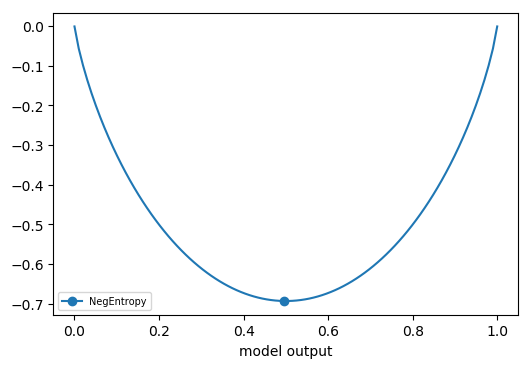

In [10]:
neg_entropy = pred * np.log(pred) + (1 - pred) * np.log(1-pred)

fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=100)
opt_idx = np.argmin(neg_entropy)
ax.plot(pred, neg_entropy, label='NegEntropy', marker='o', markevery=[opt_idx])
ax.set_xlabel('model output')
ax.legend(fontsize=7)
plt.show()

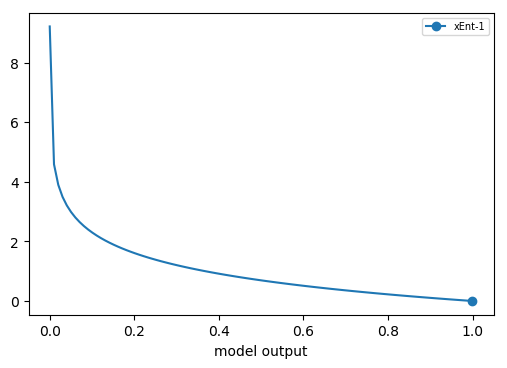

In [11]:
xentropy_1 = -np.log(pred)

fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=100)
opt_idx = np.argmin(xentropy_1)
ax.plot(pred, xentropy_1, label='xEnt-1', marker='o', markevery=[opt_idx])
ax.set_xlabel('model output')
ax.legend(fontsize=7)
plt.show()

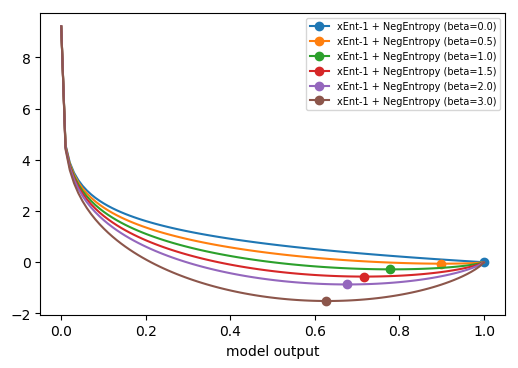

In [12]:
neg_entropy = pred * np.log(pred) + (1 - pred) * np.log(1-pred)
xentropy_1 = -np.log(pred)
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=100)

for beta in [0.0, 0.5, 1.0, 1.5, 2.0, 3.0]:
    xentropy_1_regularized = xentropy_1 + beta * neg_entropy
    opt_idx = np.argmin(xentropy_1_regularized)
    ax.plot(
        pred, xentropy_1_regularized, label='xEnt-1 + NegEntropy (beta=%1.1f)' % beta, 
        marker='o', markevery=[opt_idx])
ax.set_xlabel('model output')
ax.legend(fontsize=7)
plt.show()


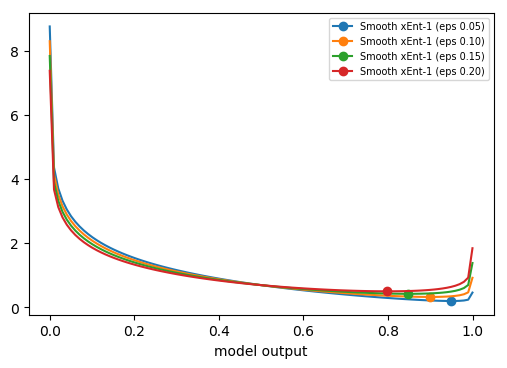

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=100)
for smooth_eps in [0.05, 0.1, 0.15, 0.2]:
    smooth_xentropy_1 = -(1 - smooth_eps) * np.log(pred) - smooth_eps * np.log(1 - pred)
    
    smooth_xentropy_1 = -np.log(pred) * (1-2*smooth_eps) + smooth_eps * (-np.log(pred) - np.log(1-pred))
    
    opt_idx = np.argmin(smooth_xentropy_1)
    ax.plot(
        pred, smooth_xentropy_1, label='Smooth xEnt-1 (eps %1.2f)' % smooth_eps, 
        marker='o', markevery=[opt_idx])
ax.set_xlabel('model output')
ax.legend(fontsize=7)
plt.show()

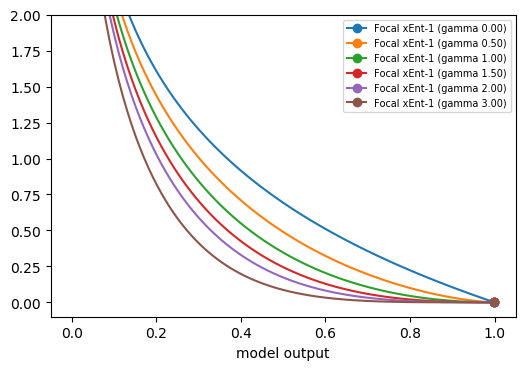

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=100)
for gamma in [0.0, 0.5, 1.0, 1.5, 2.0, 3.0]:
    focal_xentropy_1 = - np.log(pred) * ((1-pred) ** gamma)
    opt_idx = np.argmin(focal_xentropy_1)
    ax.plot(
        pred, focal_xentropy_1, label='Focal xEnt-1 (gamma %1.2f)' % gamma, 
        marker='o', markevery=[opt_idx])
ax.set_xlabel('model output')
ax.legend(fontsize=7)
ax.set_ylim([-0.1, 2])
plt.show()

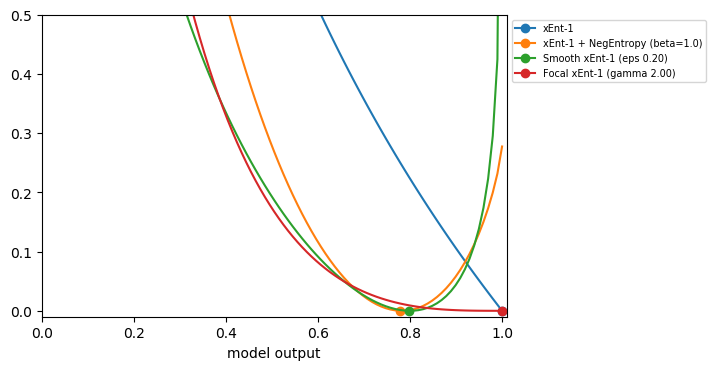

In [53]:
# Comparacion entropy regularization and smoothing
min_is_zero = True
b_eps_g_1 = [0.5, 0.1, 1.0]
b_eps_g_2 = [1.0, 0.2, 2.0]

b_eps_g = b_eps_g_2

neg_entropy = pred * np.log(pred) + (1 - pred) * np.log(1-pred)
xentropy_1 = -np.log(pred)
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=100)
opt_idx = np.argmin(xentropy_1)
ax.plot(
    pred, xentropy_1, label='xEnt-1', 
    marker='o', markevery=[opt_idx])
for beta in [b_eps_g[0]]:
    xentropy_1_regularized = xentropy_1 + beta * neg_entropy
    opt_idx = np.argmin(xentropy_1_regularized)
    if min_is_zero:
        xentropy_1_regularized = xentropy_1_regularized - xentropy_1_regularized[opt_idx]
    ax.plot(
        pred, xentropy_1_regularized, label='xEnt-1 + NegEntropy (beta=%1.1f)' % beta, 
        marker='o', markevery=[opt_idx])
for smooth_eps in [b_eps_g[1]]:
    smooth_xentropy_1 = -(1 - smooth_eps) * np.log(pred) - smooth_eps * np.log(1 - pred)
    opt_idx = np.argmin(smooth_xentropy_1)
    if min_is_zero:
        smooth_xentropy_1 = smooth_xentropy_1 - smooth_xentropy_1[opt_idx]
    ax.plot(
        pred, smooth_xentropy_1, label='Smooth xEnt-1 (eps %1.2f)' % smooth_eps, 
        marker='o', markevery=[opt_idx])
for gamma in [b_eps_g[2]]:#[1.0, 2.0]:
    focal_xentropy_1 = - np.log(pred) * ((1-pred) ** gamma)
    opt_idx = np.argmin(focal_xentropy_1)
    if min_is_zero:
        focal_xentropy_1 = focal_xentropy_1 - focal_xentropy_1[opt_idx]
    ax.plot(
        pred, focal_xentropy_1, label='Focal xEnt-1 (gamma %1.2f)' % gamma, 
        marker='o', markevery=[opt_idx])
ax.set_xlabel('model output')
ax.legend(fontsize=7, bbox_to_anchor=(1, 1))
if min_is_zero:
    ax.set_ylim([-0.01, 0.5])  
else:
    ax.set_ylim([-0.5, 1])
ax.set_xlim([0, 1.01])
plt.show()


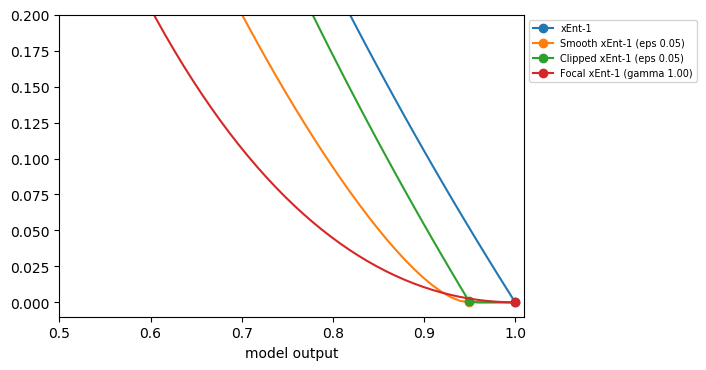

In [84]:
# disabled loss
# modified label smoothing
xentropy_1 = -np.log(pred)
min_is_zero = True
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=100)
opt_idx = np.argmin(xentropy_1)
ax.plot(
    pred, xentropy_1, label='xEnt-1', 
    marker='o', markevery=[opt_idx])
for smooth_eps in [0.05]:
    smooth_xentropy_1 = -(1 - smooth_eps) * np.log(pred) - smooth_eps * np.log(1 - pred)
    opt_idx = np.argmin(smooth_xentropy_1)
    smooth_xentropy_1[opt_idx:] = smooth_xentropy_1[opt_idx]
    if min_is_zero:
        smooth_xentropy_1 = smooth_xentropy_1 - smooth_xentropy_1[opt_idx]
    ax.plot(
        pred, smooth_xentropy_1, label='Smooth xEnt-1 (eps %1.2f)' % smooth_eps, 
        marker='o', markevery=[opt_idx])
for clipped_eps in [0.05]:
    clipped_xent = np.clip(xentropy_1 + np.log(1-clipped_eps), a_min=0, a_max=None)
    opt_idx = np.argmin((pred - 1 + clipped_eps)**2)
    ax.plot(
        pred, clipped_xent, label='Clipped xEnt-1 (eps %1.2f)' % clipped_eps, 
        marker='o', markevery=[opt_idx])
for gamma in [1]:
    focal_xentropy_1 = - np.log(pred) * ((1-pred) ** gamma)
    opt_idx = np.argmin(focal_xentropy_1)
    if min_is_zero:
        focal_xentropy_1 = focal_xentropy_1 - focal_xentropy_1[opt_idx]
    ax.plot(
        pred, focal_xentropy_1, label='Focal xEnt-1 (gamma %1.2f)' % gamma, 
        marker='o', markevery=[opt_idx])
ax.set_xlabel('model output')
ax.legend(fontsize=7, bbox_to_anchor=(1, 1))
if min_is_zero:
    ax.set_ylim([-0.01, 0.2])  
else:
    ax.set_ylim([-0.5, 1])
ax.set_xlim([0.5, 1.01])
plt.show()

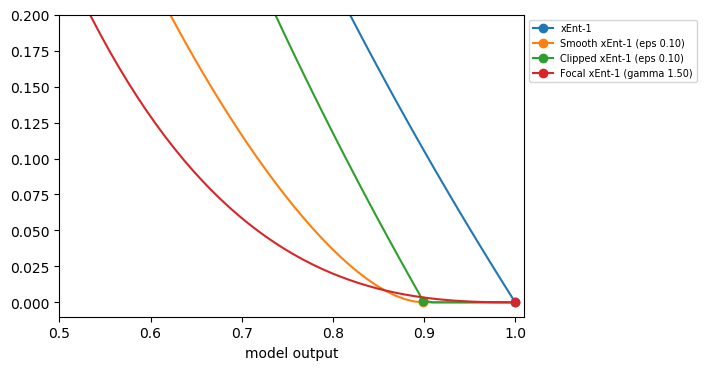

In [85]:
# disabled loss
# modified label smoothing
xentropy_1 = -np.log(pred)
min_is_zero = True
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=100)
opt_idx = np.argmin(xentropy_1)
ax.plot(
    pred, xentropy_1, label='xEnt-1', 
    marker='o', markevery=[opt_idx])
for smooth_eps in [0.1]:
    smooth_xentropy_1 = -(1 - smooth_eps) * np.log(pred) - smooth_eps * np.log(1 - pred)
    opt_idx = np.argmin(smooth_xentropy_1)
    smooth_xentropy_1[opt_idx:] = smooth_xentropy_1[opt_idx]
    if min_is_zero:
        smooth_xentropy_1 = smooth_xentropy_1 - smooth_xentropy_1[opt_idx]
    ax.plot(
        pred, smooth_xentropy_1, label='Smooth xEnt-1 (eps %1.2f)' % smooth_eps, 
        marker='o', markevery=[opt_idx])
for clipped_eps in [0.1]:
    clipped_xent = np.clip(xentropy_1 + np.log(1-clipped_eps), a_min=0, a_max=None)
    opt_idx = np.argmin((pred - 1 + clipped_eps)**2)
    ax.plot(
        pred, clipped_xent, label='Clipped xEnt-1 (eps %1.2f)' % clipped_eps, 
        marker='o', markevery=[opt_idx])
for gamma in [1.5]:
    focal_xentropy_1 = - np.log(pred) * ((1-pred) ** gamma)
    opt_idx = np.argmin(focal_xentropy_1)
    if min_is_zero:
        focal_xentropy_1 = focal_xentropy_1 - focal_xentropy_1[opt_idx]
    ax.plot(
        pred, focal_xentropy_1, label='Focal xEnt-1 (gamma %1.2f)' % gamma, 
        marker='o', markevery=[opt_idx])
ax.set_xlabel('model output')
ax.legend(fontsize=7, bbox_to_anchor=(1, 1))
if min_is_zero:
    ax.set_ylim([-0.01, 0.2])  
else:
    ax.set_ylim([-0.5, 1])
ax.set_xlim([0.5, 1.01])
plt.show()